## Exploratory Data analysis

### 1. Analysis
1. Univariate Analysis
2. Multivariate Analysis

### 2. Feature Engineering
1. Creating new columns
2. Modifying existing ones
3. Scaling the columns

### 3. Handling outliers
1. Detect outliers
2. Remove outliers

Numerical - hist, distplot
categorical - count plot, bar plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### Categorical Values
- Survived
- Pclass
- Sex
- Sibsp
- Parch
- Embarked

### Numerical values
- age
- fare
- passengerid

### Mixed columns
- Name
- Ticket
- Cabin

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Conclusion
- Missing values in age,cabin and embarked columns
- More than 70 % values are missing in cabin column, so we will have to drop it
- Few columns have inappropriate data types

In [7]:
### Dropping cabin column
data.drop(columns={'Cabin'},inplace=True)

In [8]:
### Imputing missing values of age by mean of the column
data.Age.fillna(data.Age.mean(),inplace=True)

In [9]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
### Imputing missing value of embarked

data.Embarked.fillna(data.Embarked.value_counts().reset_index()['index'][0],inplace=True)

In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Univariate analysis

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

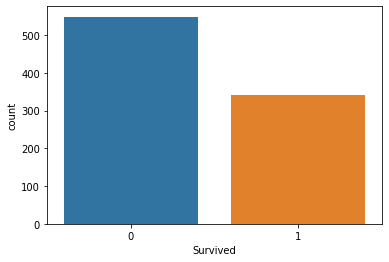

In [14]:
## Let's start with target column(survived)
#sns.histplot(data.Survived)
sns.countplot(data.Survived)

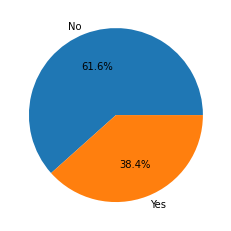

In [15]:
plt.pie(data.Survived.value_counts(),labels=['No','Yes'],autopct='%1.1f%%')
plt.show()

In [16]:
death_percentage = round(data.Survived.value_counts()[0] / data.Survived.count() * 100,2)
print("Death percentage is",death_percentage,"%")

Death percentage is 61.62 %


c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

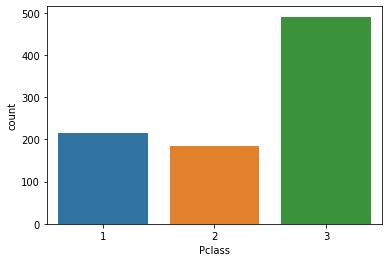

In [17]:
## Pclass column
sns.countplot(data.Pclass)

male      64.76
female    35.24
Name: Sex, dtype: float64


c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

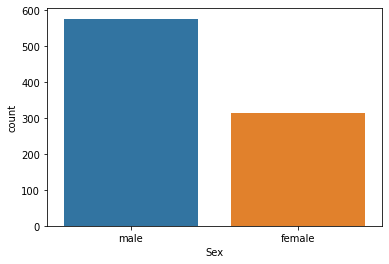

In [18]:
### Gender analysis
print(round(data.Sex.value_counts()/data.Sex.count() * 100,2))
sns.countplot(data.Sex)

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SibSp', ylabel='count'>

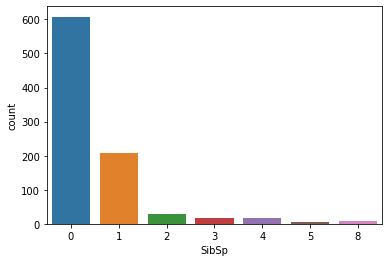

In [19]:
### Sibsp

sns.countplot(data.SibSp)

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parch', ylabel='count'>

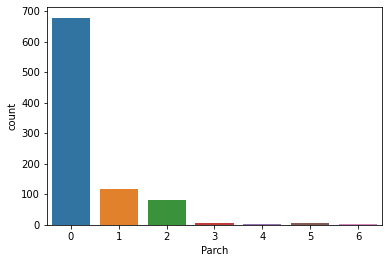

In [20]:
sns.countplot(data.Parch)

In [21]:
### Embarked analysis

print(round(data.Embarked.value_counts()/data.Embarked.count()*100,2))

S    72.50
C    18.86
Q     8.64
Name: Embarked, dtype: float64


c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

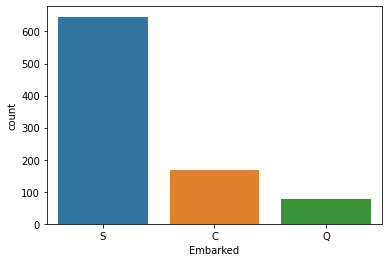

In [22]:
sns.countplot(data.Embarked)

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

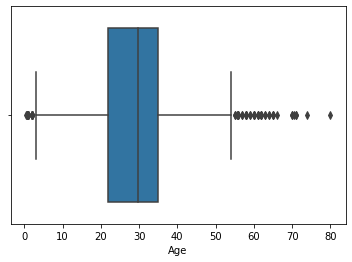

In [23]:
## Age

sns.boxplot(data.Age)

c:\program files\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

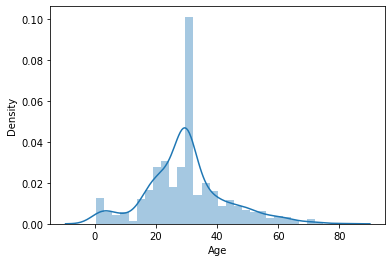

In [24]:
sns.distplot(data['Age'])

In [25]:
print(data.Age.skew())
print(data.Age.kurt())

0.4344880940129925
0.9662793026645233


###  data range of -0.5 to 0.5 can be considered as normal distribution

In [26]:
print("People with age in between 60 and 70 are",data[(data.Age>60) & (data.Age<70)].shape[0])
print("People with age in between 70 and 75 are",data[(data.Age>=70) & (data.Age<75)].shape[0])
print("People with age greater than 75 are",data[data.Age>=75].shape[0])
print("****"*10)
print("People with age in between 0 and 1 are",data[data.Age<1].shape[0])

People with age in between 60 and 70 are 15
People with age in between 70 and 75 are 6
People with age greater than 75 are 1
****************************************
People with age in between 0 and 1 are 7


## Conclusion

- Age can be considered as normal distribution
- More analysis is required for outlier detection

c:\program files\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

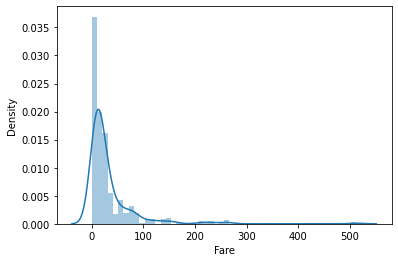

In [27]:
## Fair

sns.distplot(data.Fare)

#### This is right skewed data

In [28]:
print(data.Fare.skew())
print(data.Fare.kurt())

4.787316519674893
33.39814088089868


##### The skew and kurt is very large

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fare'>

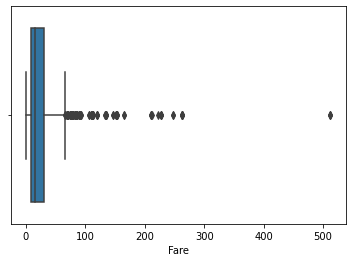

In [29]:
sns.boxplot(data.Fare)

In [30]:
print("People with fare in between $200 and $300 are",data[(data.Fare > 200) & (data.Fare < 300)].shape[0])
print("People with fare above $300 are",data[data.Fare > 300].shape[0])

People with fare in between $200 and $300 are 17
People with fare above $300 are 3


### Conclusion
- Highly skewed data which indicates lot of people bought tickets in cheaper price
- Outliers are present. Need to check them

### Multivariate Analysis

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

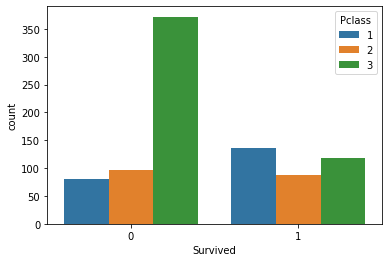

In [31]:
## Survival with Pclass
sns.countplot(data.Survived, hue = data.Pclass)

In [32]:
pd.crosstab(data.Pclass,data.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [33]:
pd.crosstab(data.Pclass,data.Survived).apply(lambda r : round(r/r.sum()*100,1),axis=1)

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

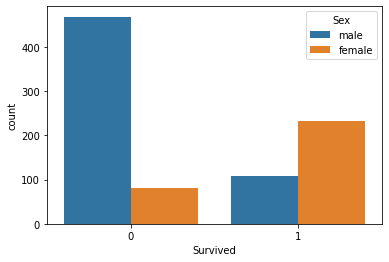

In [34]:
### Survival with sex
sns.countplot(data.Survived,hue=data.Sex)

In [35]:
pd.crosstab(data.Sex,data.Survived).apply(lambda r : round(r/r.sum()*100,1),axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


In [36]:
### Survival with Embarked
pd.crosstab(data.Embarked,data.Survived).apply(lambda r : round(r/r.sum()*100,1),axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


c:\program files\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


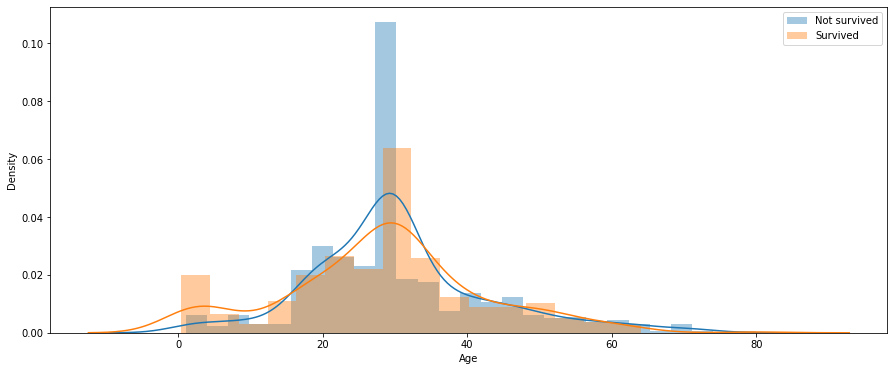

In [37]:
### Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(data[data.Survived == 0]['Age'],label="Not survived")
sns.distplot(data[data.Survived == 1]['Age'],label="Survived")
plt.legend()

c:\program files\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


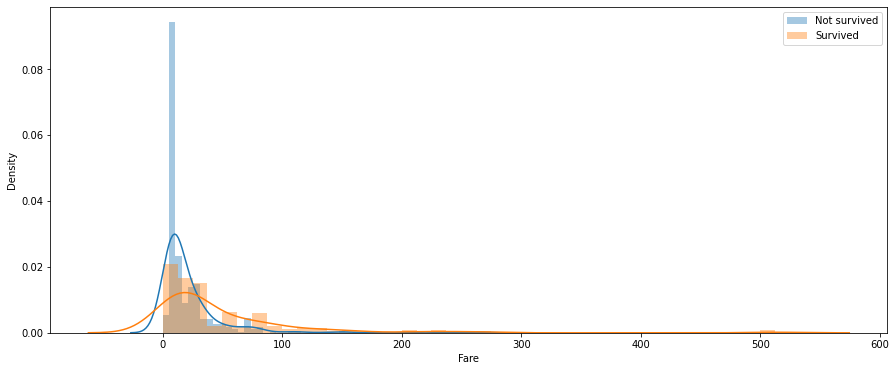

In [38]:
### Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(data[data.Survived == 0]['Fare'],label="Not survived")
sns.distplot(data[data.Survived == 1]['Fare'],label="Survived")
plt.legend()

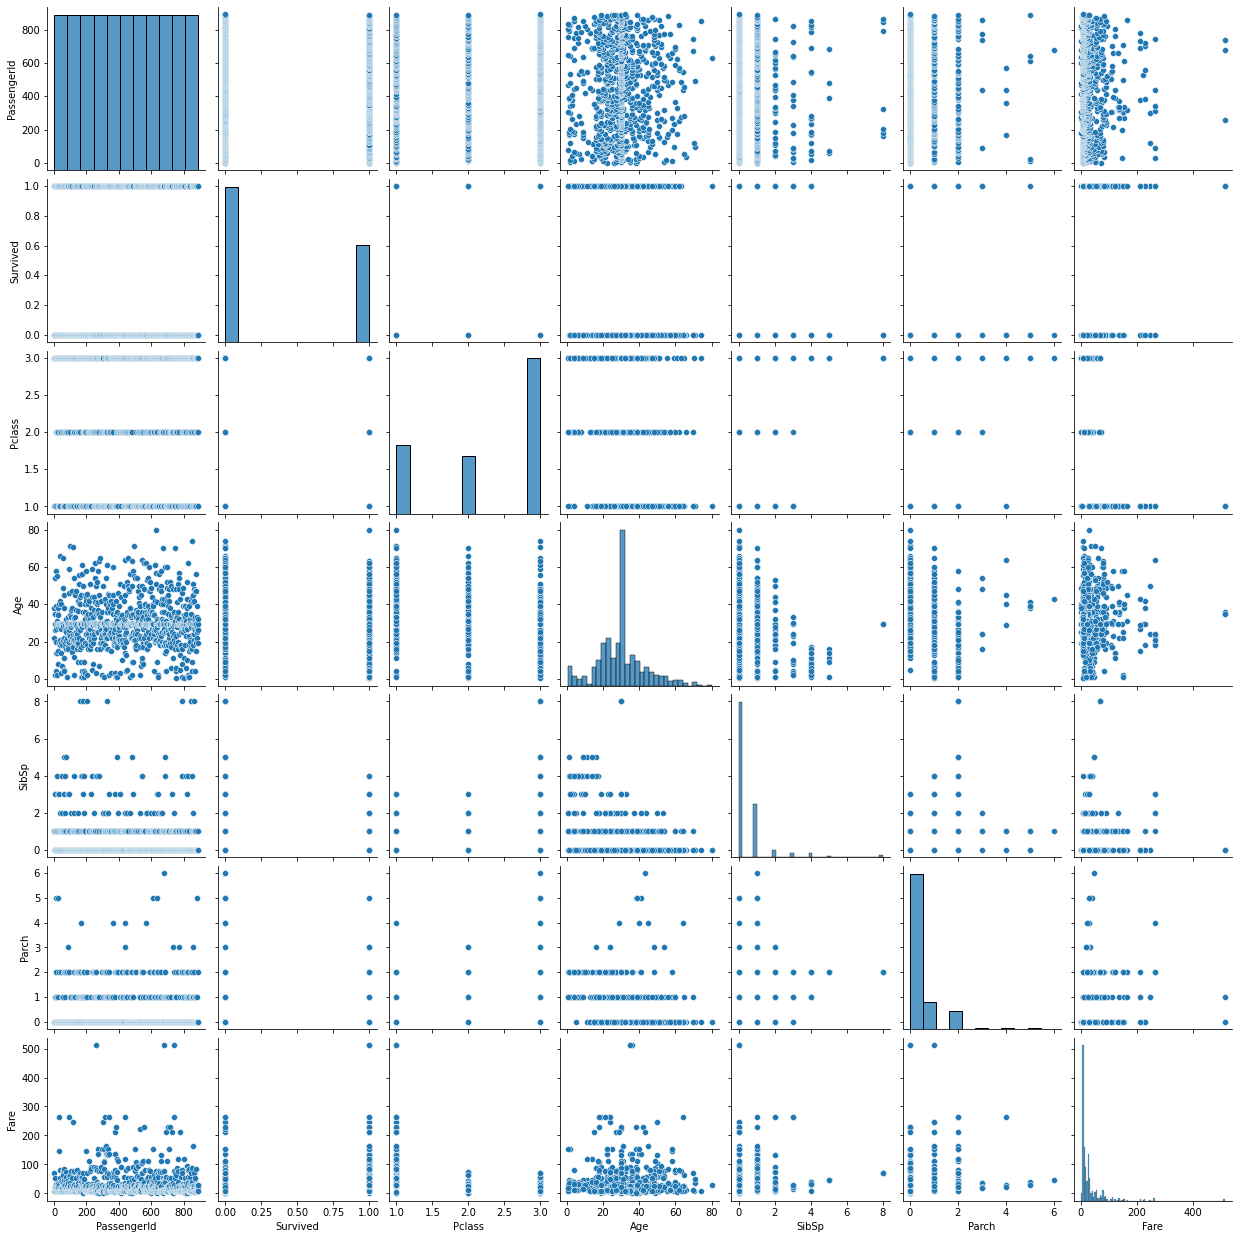

In [39]:
sns.pairplot(data)

<AxesSubplot:>

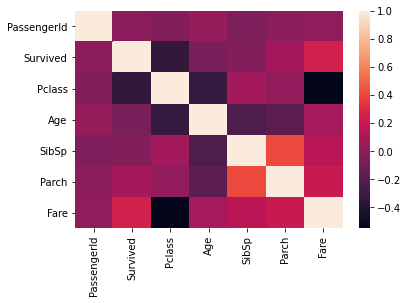

In [40]:
sns.heatmap(data.corr())

### Feature Engineering

In [41]:
## We will create a new column by the name of family which will be sum of subsp and parch cols

data['Family_size'] = data.Parch + data.SibSp

In [42]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [43]:
### Now we will add new column named Family Type

def family_type(number):
    if number==0:
        return 'Alone'
    elif number > 0 and number < 4:
        return 'Medium'
    elif number > 5:
        return 'Large'

In [44]:
data['Family Type'] = data.Family_size.apply(family_type)

In [45]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Family Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,3,Medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0,Alone


In [46]:
data.drop(columns={"SibSp","Parch","Family_size"},inplace=True)

In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,Alone


In [49]:
pd.crosstab(data['Family Type'],data.Survived).apply(lambda r : round(r/r.sum()*100,1),axis=1)

Survived,0,1
Family Type,,
Alone,69.6,30.4
Large,84.0,16.0
Medium,42.1,57.9


## Detecting outliers

### Numerical Data
- If the data is following normal distribution, anything beyound 3SD - mean and 3SD + Mean can be considered as outlier
- If the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5*IQR and Q3 + 1.5 * IQR

### Categorical Data
- If the col is highly imbalanced for eg male 10000 and female 2 then ignore female

c:\program files\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

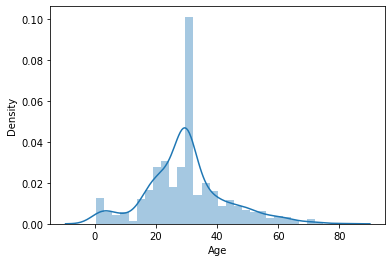

In [50]:
### Handling outlier with age column

sns.distplot(data.Age)

In [51]:
### Since age column is almost following normal distribution, we can follow 3 SD rule

data = data[data.Age < (data.Age.mean() + 3 * data.Age.std())]

In [52]:
data.shape

(884, 10)

In [53]:
### Handling outliers in Fare column
### Since it is not following normal distribution, we can follow inter quartile logic

q1 = np.percentile(data.Fare,25)
q3 = np.percentile(data.Fare,75)

outlier_low = q1 - 1.5*(q3-q1)
outlier_high = q3 + 1.5*(q3-q1)

data = data[(data.Fare > outlier_low) & (data.Fare < outlier_high)]
data

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,Alone
5,6,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,Q,Alone
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,S,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,S,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,23.4500,S,Medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,C,Alone


### One hot encoding(Convert categorical columns into numerical columns)

In [57]:
data = pd.get_dummies(data=data,columns=['Pclass','Sex','Embarked','Family Type'],drop_first=True)

<AxesSubplot:>

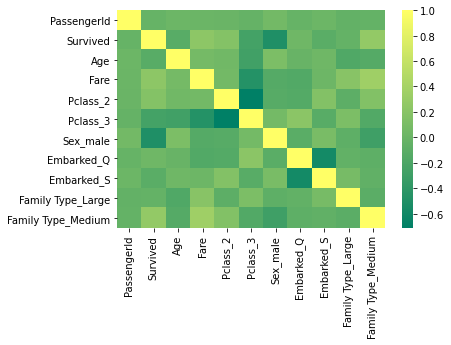

In [58]:
sns.heatmap(data.corr(),cmap='summer',)